In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['fivethirtyeight'])
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv('/content/weatherHistory.csv')

In [11]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [12]:
df.shape

(96453, 12)

In [13]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [14]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [15]:
df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [16]:
df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [17]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [18]:
df.dropna(inplace = True)

In [19]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [20]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [21]:
df['Date'] = pd.to_datetime(df['Formatted Date'])

In [22]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00+02:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00+02:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00+02:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00+02:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00+02:00


In [23]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
Date                         object
dtype: object

In [24]:
df['Formatted Date'] = df['Formatted Date'].apply(lambda x:x[:-6])

In [25]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00+02:00
1,2006-04-01 01:00:00.000,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00+02:00
2,2006-04-01 02:00:00.000,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00+02:00
3,2006-04-01 03:00:00.000,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00+02:00
4,2006-04-01 04:00:00.000,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00+02:00


In [26]:
df['Date'] = pd.to_datetime(df['Formatted Date'])

In [27]:
df.dtypes

Formatted Date                      object
Summary                             object
Precip Type                         object
Temperature (C)                    float64
Apparent Temperature (C)           float64
Humidity                           float64
Wind Speed (km/h)                  float64
Wind Bearing (degrees)             float64
Visibility (km)                    float64
Loud Cover                         float64
Pressure (millibars)               float64
Daily Summary                       object
Date                        datetime64[ns]
dtype: object

In [28]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00
1,2006-04-01 01:00:00.000,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00
2,2006-04-01 02:00:00.000,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00
3,2006-04-01 03:00:00.000,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00
4,2006-04-01 04:00:00.000,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00


In [29]:
df.drop(['Formatted Date','Loud Cover'],axis = 1,inplace = True)

In [30]:
df.drop(['Apparent Temperature (C)'],axis=1,inplace=True)

In [31]:
lc = LabelEncoder()

In [32]:
df['Precip Type'] = lc.fit_transform(df['Precip Type'])

In [33]:
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date
0,Partly Cloudy,0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00
1,Partly Cloudy,0,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00
2,Mostly Cloudy,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00
3,Partly Cloudy,0,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00
4,Mostly Cloudy,0,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00


In [34]:
df['Summary'] = lc.fit_transform(df['Summary'])

In [35]:
df['Summary'].value_counts()

19    31635
17    27914
18    16516
6     10763
12     7117
4       528
3       516
5       386
11       86
26       67
16       63
0        54
25       45
13       40
8        39
2        35
24       35
9        34
15       17
10       14
20       10
21        8
14        7
23        4
22        1
7         1
1         1
Name: Summary, dtype: int64

<ipython-input-36-5d68f2b70a54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

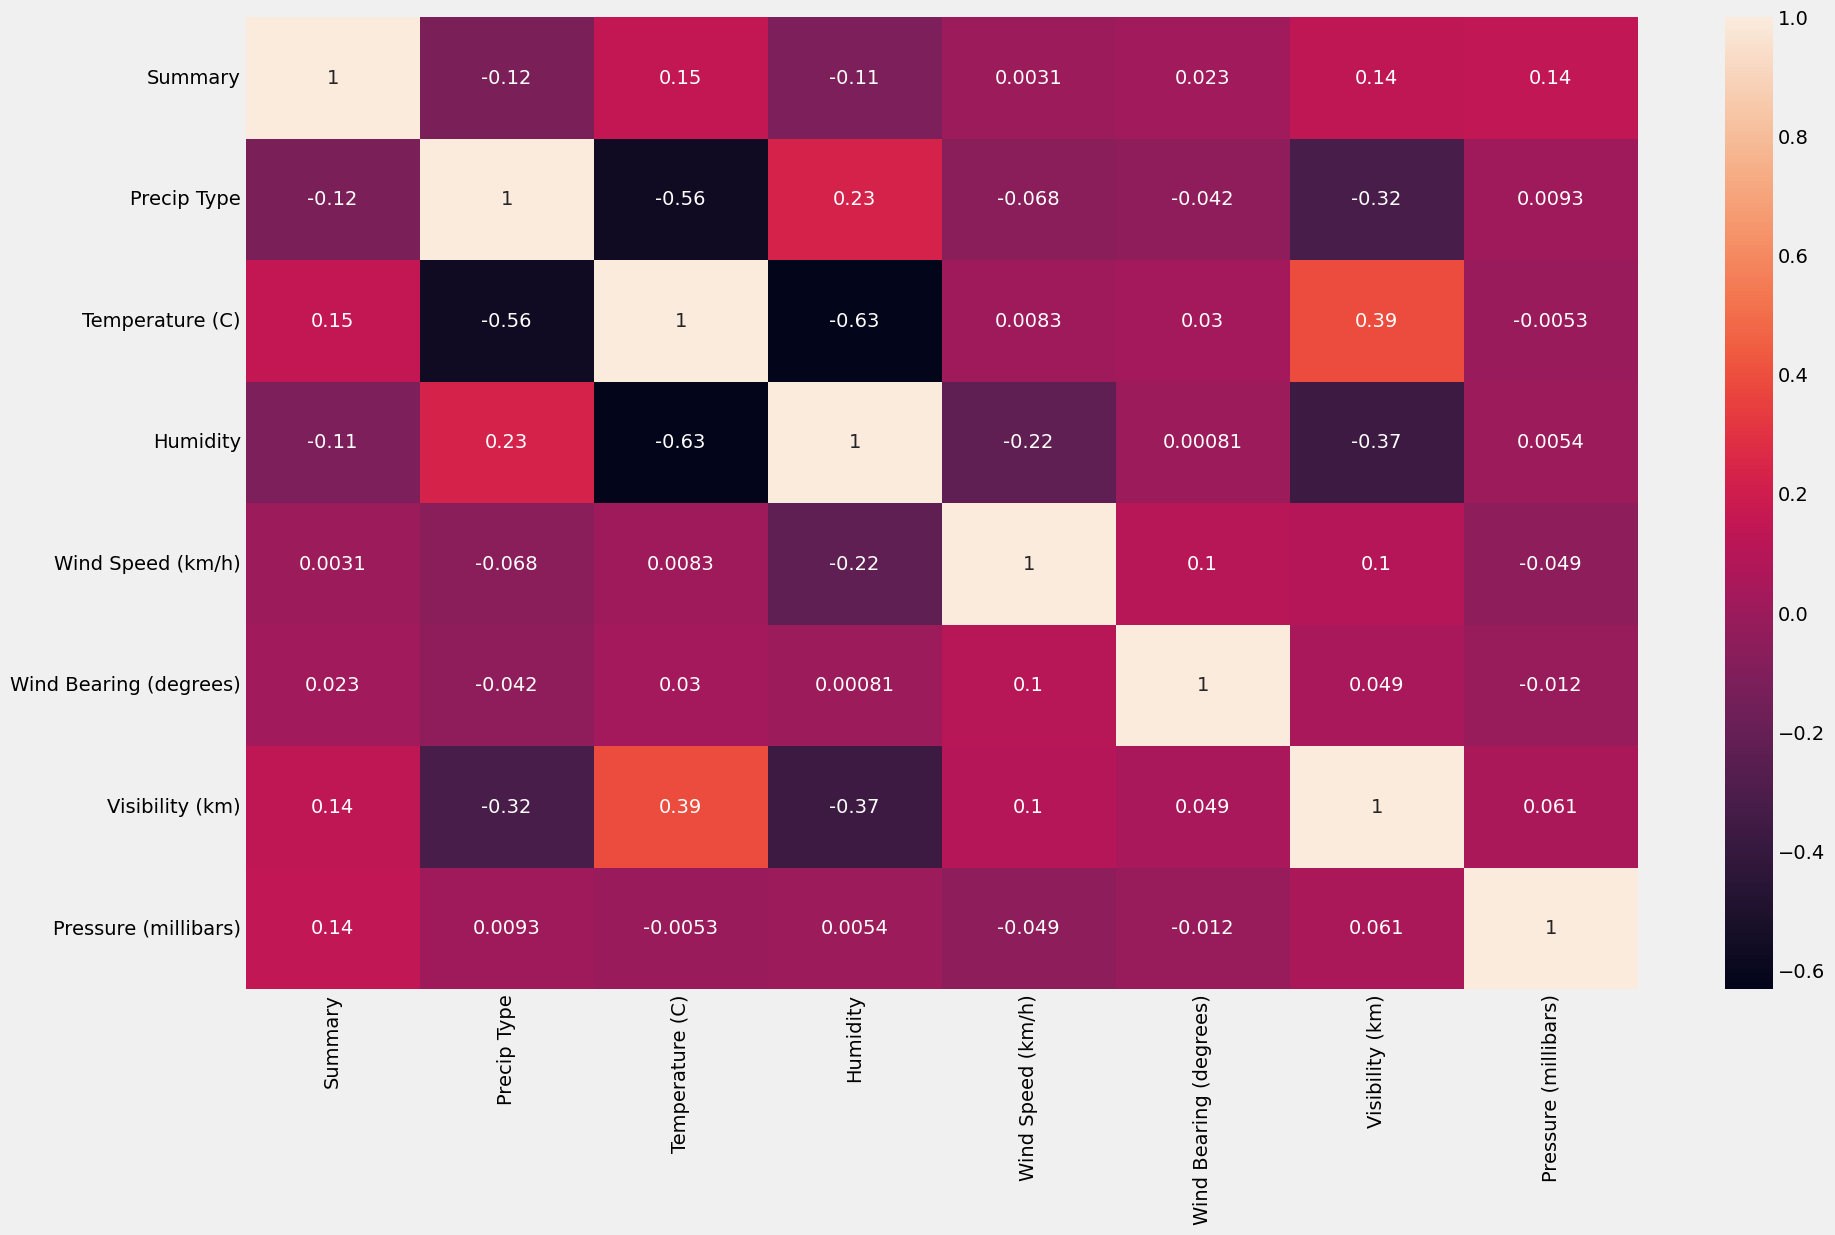

In [36]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),annot = True)

In [39]:
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date
0,19,0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00
1,19,0,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00
2,17,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00
3,19,0,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00
4,17,0,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00


In [40]:
df.set_index('Date',inplace = True)

In [41]:
df.drop(['Daily Summary'],axis = 1,inplace = True)

In [38]:
sc = StandardScaler()

In [43]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [48]:
X = df.drop(['Temperature (C)'],axis = 1)
y = df['Temperature (C)']

In [52]:
df_scaled = pd.DataFrame(sc.fit_transform(df),columns = df.columns)

In [53]:
df_scaled

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.685536,-0.354531,-0.257951,0.792748,0.478964,0.591157,1.309107,0.102152
1,0.685536,-0.354531,-0.270141,0.639470,0.499902,0.665655,1.309107,0.106415
2,0.226376,-0.354531,-0.267819,0.792748,-0.993620,0.153478,1.100806,0.109058
3,0.685536,-0.354531,-0.381594,0.486192,0.476638,0.758778,1.309107,0.113066
4,0.226376,-0.354531,-0.332833,0.486192,0.034630,0.665655,1.309107,0.113919
...,...,...,...,...,...,...,...,...
95931,0.685536,-0.354531,1.470719,-1.557511,0.027651,-1.457551,1.374684,0.095586
95932,0.685536,-0.354531,1.320955,-1.302048,-0.102625,-1.559986,1.243531,0.102407
95933,0.685536,-0.354531,1.055095,-0.893308,-0.263144,-1.466863,1.374684,0.106671
95934,0.685536,-0.354531,1.001110,-0.688937,-0.039813,-1.559986,1.374684,0.109144


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
pred = lr.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error,r2_score

In [62]:
mse = mean_squared_error(y_test,pred)

In [63]:
np.sqrt(mse)

5.965768085858335

In [64]:
pred

array([-6.67397178, 14.27504153,  5.94214484, ..., 11.11416815,
        9.25365825, 14.62163592])

In [69]:
y_test[y_test<0]

Date
2011-12-02 10:00:00   -2.088889
2015-01-28 05:00:00   -0.027778
2012-01-15 00:00:00   -1.666667
2007-12-27 02:00:00   -4.400000
2013-03-24 03:00:00   -4.405556
                         ...   
2006-02-01 10:00:00   -2.233333
2007-12-23 08:00:00   -5.027778
2006-02-28 00:00:00   -4.038889
2010-02-09 06:00:00   -9.750000
2016-12-09 03:00:00   -0.227778
Name: Temperature (C), Length: 3100, dtype: float64

In [70]:
import pickle

In [71]:
pickle.dump(lr,open('regmodel.pkl','wb'))

In [72]:
pickled = pickle.load(open('regmodel.pkl','rb'))

In [74]:
pred2 = pickled.predict(X_test)

In [75]:
mse2 = mean_squared_error(pred2,y_test)

In [76]:
mse2

35.59038885424582